## IMPORT LIBRARY

In [ ]:
pip install nltk

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

lb = LabelEncoder()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## LOAD DATASET
Dataset is scrapped from X https://x.com/home

In [ ]:
dataset = pd.read_excel('/content/dataset siap.xls')

dataset.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1220000000000000000,Mon Feb 03 10:12:57 +0000 2020,2759,STOP KLITIH Semua lapisan masyarakat yogyakart...,1.220000e+18,https://pbs.twimg.com/ext_tw_video_thumb/12242...,NaN,in,NaN,79.0,79.0,1386.0,https://twitter.com/Mbendol52768653/status/122...,1.210000e+18,Mbendol52768653
1,1700000000000000000,Wed Sep 13 02:38:26 +0000 2023,3704,The Center of Education Klitih Yogyakarta #Gen...,1.700000e+18,https://pbs.twimg.com/media/F531qX0bsAAyz6K.jpg,NaN,in,indonesia,294.0,75.0,728.0,https://twitter.com/weebsalter/status/17017873...,1.220000e+18,weebsalter
2,1380000000000000000,Wed Apr 21 04:30:41 +0000 2021,1685,oke lanjut dari kasus kemarin soal akun IG San...,1.380000e+18,https://pbs.twimg.com/media/EzeJL_bVEAcwTpk.jpg,NaN,in,"Yogyakarta, Indonesia",97.0,135.0,624.0,https://twitter.com/txtfromjogja/status/138472...,1.360000e+18,txtfromjogja
3,1510000000000000000,Tue Apr 05 05:27:14 +0000 2022,7286,Minton nemu dokumenter pendek judulnya Klitih:...,1.510000e+18,https://pbs.twimg.com/media/FPjo-rnaQAA1hCH.jpg,NaN,in,Indonesia,97.0,47.0,2042.0,https://twitter.com/HabisNontonFilm/status/151...,1.080000e+18,HabisNontonFilm
4,1620000000000000000,Sat Feb 11 01:47:29 +0000 2023,86,2 Geng Kondang di Yogyakarta Q-Zruh dan Joxzin...,1.620000e+18,NaN,NaN,in,Kebumen,8.0,27.0,23.0,https://twitter.com/widodogroho/status/1624223...,1.440265e+08,widodogroho


In [ ]:
dataset.isnull().sum()

conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                      31
image_url                  916
in_reply_to_screen_name    687
lang                        31
location                   358
quote_count                 32
reply_count                 32
retweet_count               32
tweet_url                   32
user_id_str                 32
username                    32
dtype: int64

In [ ]:
dataset_cleaned_rows = dataset.dropna()
dataset_cleaned_columns = dataset.dropna(axis=1)

# PRE-PROCESSING

In [ ]:
def DataPrep(full_text) :
    full_text = re.sub('<.*?>', '', full_text)
    full_text = re.sub(r'http\S+', '', full_text)
    full_text = re.sub(r'@\S+', '', full_text)
    full_text = re.sub(r'#\S+', '', full_text)
    full_text = re.sub(r'\d+', '', full_text)
    full_text = re.sub(r'[^\w\s]', '', full_text)
    full_text = re.sub(r'@(\w+)', '', full_text)

    #tokenize
    tokens = nltk.word_tokenize(full_text)

    #remove puncs
    punc = list(punctuation)
    words = [w for w in tokens if w not in punc]

    #remove stop words
    stop_words = set(stopwords.words('indonesian'))
    words = [w.lower() for w in words if not w.lower() in stop_words]

    # lemmatization
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemming_tokens = [stemmer.stem(token) for token in words]

    text = ' '.join(stemming_tokens)


    return text

In [ ]:
dataset['full_text'] = dataset['full_text'].astype(str).apply(DataPrep)

In [ ]:
print(dataset['full_text'])

0       stop klitih lapis masyarakat yogyakarta satu l...
1               the center of education klitih yogyakarta
2       oke kemarin akun ig sangar mengatasnamakan gan...
3       minton nemu dokumenter pendek judul klitih war...
4       geng kondang yogyakarta qzruh joxzin akar klit...
                              ...                        
1089    daridulu jogja bentrok tawur ajar klitih jadi ...
1090    yg bikin anak ajar klitih gengster jahat orang...
1091    nek nang jatim sing kerep mlebu berita tawur g...
1092                     gudeg malioboro kota ajar klitih
1093    alas kuliah amerika ngeri aman ajar klitih pak...
Name: full_text, Length: 1094, dtype: object


## REMOVE DUPLICATE

In [ ]:
print(f'There are around {int(dataset["full_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 197 duplicated tweets, we will remove them.


In [ ]:
dataset.drop_duplicates("full_text", inplace=True)

In [ ]:
print(f'There are around {int(dataset["full_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 0 duplicated tweets, we will remove them.


# LABELLING
Labeling using Valence Aware Dictionary for Sentiment Reasoning (VADER) into 2 classes: Rawan and Kurang rawan

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# Inisialisasi VADER
sia = SentimentIntensityAnalyzer()

# Fungsi untuk menentukan kategori urgent atau tidak urgent berdasarkan sentimen
def categorize_sentiment(row, urgent_words=None):
    sentiment_scores = sia.polarity_scores(row['full_text'])

    # Jika terdapat kata-kata tertentu dalam kalimat, kategorikan sebagai 'urgent'
    if urgent_words and any(word in row['full_text'] for word in urgent_words):
        return 'rawan'
    # Jika nilai sentimen negatif lebih tinggi, kategorikan sebagai 'urgent'
    elif sentiment_scores['neg'] > sentiment_scores['pos']:
        return 'rawan'
    else:
        return 'kurang rawan'

# Terapkan fungsi pada setiap baris data untuk menentukan kategori
# Di sini, kita memberikan daftar kata-kata mendesak sebagai contoh, Anda dapat mengubahnya sesuai kebutuhan
urgent_keywords = ["klitih", "sajam", "bahaya", "ngeri", "mati", "korban", "tersangka"]
dataset['label'] = dataset.apply(lambda row: categorize_sentiment(row, urgent_words=urgent_keywords), axis=1)

# Tampilkan data yang telah ditambahkan kategori urgent atau tidak urgent
print(dataset[['full_text', 'label']])

                                              full_text  label
0     stop klitih lapis masyarakat yogyakarta satu l...  rawan
1             the center of education klitih yogyakarta  rawan
2     oke kemarin akun ig sangar mengatasnamakan gan...  rawan
3     minton nemu dokumenter pendek judul klitih war...  rawan
4     geng kondang yogyakarta qzruh joxzin akar klit...  rawan
...                                                 ...    ...
1089  daridulu jogja bentrok tawur ajar klitih jadi ...  rawan
1090  yg bikin anak ajar klitih gengster jahat orang...  rawan
1091  nek nang jatim sing kerep mlebu berita tawur g...  rawan
1092                   gudeg malioboro kota ajar klitih  rawan
1093  alas kuliah amerika ngeri aman ajar klitih pak...  rawan

[897 rows x 2 columns]


In [ ]:
dataset['label'].value_counts()

rawan           842
kurang rawan     55
Name: label, dtype: int64

In [ ]:
!pip install xlwt

# Simpan dataframe yang sudah dilabeli ke file Excel
labeled_file_path = 'unity_labeled.xls'  # Ubah ekstensi file sesuai kebutuhan, misalnya .xls atau .xlsx
dataset.to_excel(labeled_file_path, index=False)

# Berikan tautan untuk mengunduh file labeled Excel
download_link = f'Klik di sini untuk mengunduh file labeled Excel.'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.2 MB/s eta 0:00:00


<ipython-input-38-b4d7e2d5b052>:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  dataset.to_excel(labeled_file_path, index=False)


## LOAD DATASET LABELED

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

lb = LabelEncoder()

In [ ]:
dataset_label = pd.read_excel('/content/unity_labeled.xls')
dataset_label.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,label
0,1220000000000000000,Mon Feb 03 10:12:57 +0000 2020,2759,stop klitih lapis masyarakat yogyakarta satu l...,1.220000e+18,https://pbs.twimg.com/ext_tw_video_thumb/12242...,NaN,in,NaN,79.0,79.0,1386.0,https://twitter.com/Mbendol52768653/status/122...,1.210000e+18,Mbendol52768653,rawan
1,1700000000000000000,Wed Sep 13 02:38:26 +0000 2023,3704,the center of education klitih yogyakarta,1.700000e+18,https://pbs.twimg.com/media/F531qX0bsAAyz6K.jpg,NaN,in,indonesia,294.0,75.0,728.0,https://twitter.com/weebsalter/status/17017873...,1.220000e+18,weebsalter,rawan
2,1380000000000000000,Wed Apr 21 04:30:41 +0000 2021,1685,oke kemarin akun ig sangar mengatasnamakan gan...,1.380000e+18,https://pbs.twimg.com/media/EzeJL_bVEAcwTpk.jpg,NaN,in,"Yogyakarta, Indonesia",97.0,135.0,624.0,https://twitter.com/txtfromjogja/status/138472...,1.360000e+18,txtfromjogja,rawan
3,1510000000000000000,Tue Apr 05 05:27:14 +0000 2022,7286,minton nemu dokumenter pendek judul klitih war...,1.510000e+18,https://pbs.twimg.com/media/FPjo-rnaQAA1hCH.jpg,NaN,in,Indonesia,97.0,47.0,2042.0,https://twitter.com/HabisNontonFilm/status/151...,1.080000e+18,HabisNontonFilm,rawan
4,1620000000000000000,Sat Feb 11 01:47:29 +0000 2023,86,geng kondang yogyakarta qzruh joxzin akar klit...,1.620000e+18,NaN,NaN,in,Kebumen,8.0,27.0,23.0,https://twitter.com/widodogroho/status/1624223...,1.440265e+08,widodogroho,rawan


## SPLIT DATASET
Split the dataset into 80% for training data and 20% for testing data

In [ ]:
X = dataset_label['full_text'].tolist()
y = dataset_label['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Jumlah data latih
num_train = len(X_train)
print("Jumlah data latih:", num_train)

# Jumlah data uji
num_test = len(X_test)
print("Jumlah data uji:", num_test)

Jumlah data latih: 717
Jumlah data uji: 180


## VECTORIZER
The tokenized words are converted into vectors using Term Frequency-Inverse Document Frequency (TF-IDF)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit_transform(X_train)

print("No. of feature words: ",len(vectorizer.get_feature_names_out()))

No. of feature words:  10005


In [ ]:
x_train = vectorizer.transform(X_train).toarray()
x_test = vectorizer.transform(X_test).toarray()

In [ ]:
train_vectors = pd.DataFrame(x_train,columns=vectorizer.get_feature_names_out())

In [ ]:
for i in range(5) :
    print(sorted(list(train_vectors.iloc[i,:]),reverse = True)[:20])
    print('--------------------------------------------------')

[0.2622302835869305, 0.2622302835869305, 0.2622302835869305, 0.2622302835869305, 0.2622302835869305, 0.2622302835869305, 0.24678349433561952, 0.22732284138005662, 0.22732284138005662, 0.22732284138005662, 0.22732284138005662, 0.220377033695377, 0.20493024444406596, 0.2009163807398141, 0.1972853993520168, 0.18809797633442535, 0.1854695914885031, 0.17852378380382344, 0.1745099200995716, 0.1257108625233384]
--------------------------------------------------
[0.35460827432500996, 0.3430671474086555, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.17153357370432776, 0.16142931371462826, 0.16142931371462826, 0.16142931371462826, 0.16142931371462826, 0.16142931371462826]
--------------------------------------------------
[0.37480275024169557, 0.20838571408296658, 0.20838571408296658, 0.2083

In [ ]:
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## SMOTE
To avoid models more likely to study certain classes (unbalanced data). Then Data Balancing is needed, one of which is by using Synthetic Minority Oversampling Technique (SMOTE).

In [ ]:
from imblearn.over_sampling import SMOTE
# Ganti Random Over Sampling dengan SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Buat DataFrame baru
os = pd.DataFrame(list(zip([x[0] for x in X_resampled], y_resampled)), columns=['full_text', 'Label'])

# Tampilkan distribusi kelas setelah penerapan SMOTE
os['Label'].value_counts()

Label
1    674
0    674
Name: count, dtype: int64

## BUILDING ENSEMBLE LEARNING MODEL

A combination of Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost was developed to build an Ensemble Learning Voting Classifier Model.

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC(probability=True)
model5 = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3), ('svm', model4), ('xgb', model5)], voting='soft')

ensemble_model.fit(X_resampled, y_resampled)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eva...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [ ]:
y_pred_ensemble = ensemble_model.predict(x_test)
y_pred_proba_ensemble = ensemble_model.predict_proba(x_test)

In [ ]:
train_acc4 = ensemble_model.score(X_resampled, y_resampled)
test_acc4 = accuracy_score(y_test , y_pred_ensemble)

## METRICS EVALUATION

In [ ]:
print(train_acc4)
print(test_acc4)

1.0
0.9833333333333333


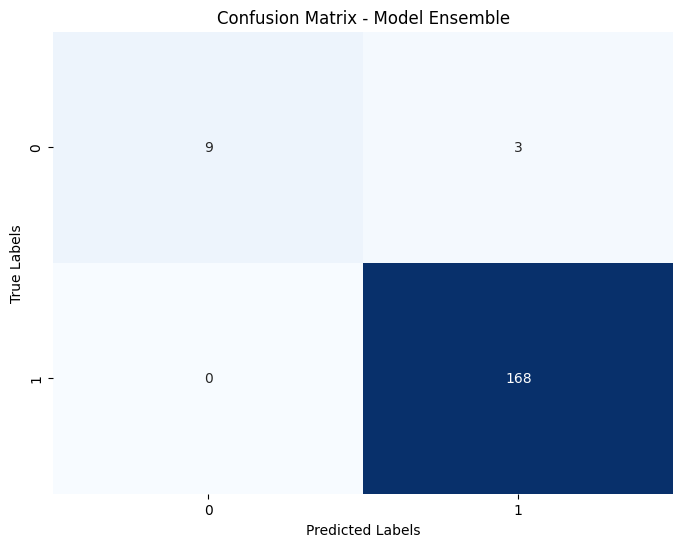

In [ ]:
cm = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Model Ensemble")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.98      1.00      0.99       168

    accuracy                           0.98       180
   macro avg       0.99      0.88      0.92       180
weighted avg       0.98      0.98      0.98       180



## TESTING MODEL

In [ ]:
def analyze_sentiment(text):
    text_vectorized = vectorizer.transform([text]).toarray()
    prediction = ensemble_model.predict(text_vectorized)
    if prediction >= 0.5:
        return "Rawan"
    else:
        return "Tidak Rawan"

# Input teks dari pengguna
input_text = input("Enter your text: ")

# Analisis sentimen
sentiment = analyze_sentiment(input_text)
print("Sentiment:", sentiment)

Enter your text: malam ini banyak klitih yang berkeliaran di jalan
Sentiment: Rawan


In [ ]:
def analyze_sentiment(text):
    text_vectorized = vectorizer.transform([text]).toarray()
    prediction = ensemble_model.predict(text_vectorized)
    if prediction >= 0.5:
        return "Rawan"
    else:
        return "Tidak Rawan"

# Input teks dari pengguna
input_text = input("Enter your text: ")

# Analisis sentimen
sentiment = analyze_sentiment(input_text)
print("Sentiment:", sentiment)

Enter your text: yogyakarta aman dan nyaman untuk dikunjungi
Sentiment: Tidak Rawan
